# SE Data dump
The CSV files used here are exported from postgreSQL queries. Specifically:
1. 'user_post_count.csv' came from 'user_post_count.sql'
2. 'user_comment_count.csv' came from 'user_comment_count.sql' 
3. 'questions_answers_comments.csv' came from 'questions_answers_comments.sql'
4. 'questions_answers.csv' came from 'questions_answers.sql'
5. 'excerpt_topic_counts.csv' came from 'user_excerptpost_topic_counts.sql'
6. 'wiki_topic_counts.csv' came from 'user_wikipost_topic_counts.sql'. See readme.txt for more details.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

user_post_df = pd.read_csv('user_post_count.csv')
user_comment_df = pd.read_csv('user_comment_count.csv')
user_post_df['age'] = user_post_df['age'].astype('str')
user_comment_df['age'] = user_comment_df['age'].astype('str')

user_post_df['age'] = user_post_df['age'].astype('float')
user_comment_df['age'] = user_comment_df['age'].astype('float')

ques_rep_df = pd.read_csv('questions_answers_comments.csv')
ques_rep_df['ques_to_reply_ratio'] = (ques_rep_df['ques_count'])/(ques_rep_df['ans_count']+ques_rep_df['comment_count'])

ques_ans_df = pd.read_csv('questions_answers.csv')
ques_ans_df['ques_to_ans_ratio'] = (ques_ans_df['ques_count'])/(ques_ans_df['ans_count'])

excerpt_topic_cts_df = pd.read_csv('excerpt_topic_counts.csv')
wiki_topic_cts_df = pd.read_csv('wiki_topic_counts.csv')

# Age distribution of Users
Many of the user accounts are 1-2 years of age. We also see that there are more posters than commenters.

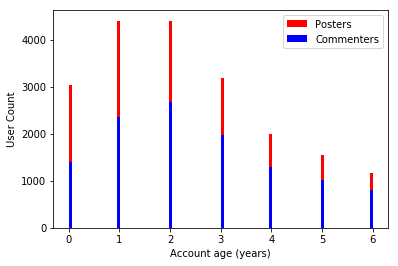

In [2]:
plt.hist(user_post_df['age'], bins=100, color='r', label= 'Posters')
plt.hist(user_comment_df['age'], bins=100, color='b', label= 'Commenters')
plt.xlabel('Account age (years)')
plt.ylabel('User Count')
plt.legend()

# User reputation distribution
Many of the users have less than 5000 reputation points.

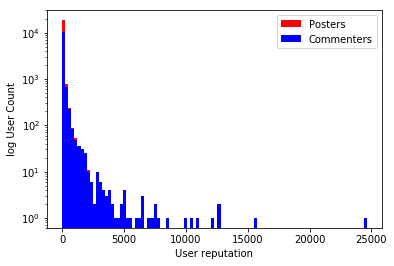

In [3]:
plt.hist(user_post_df['reputation'], bins=100, color='r', label= 'Posters')
plt.hist(user_comment_df['reputation'], bins=100, color='b', label= 'Commenters')
plt.xlabel('User reputation')
plt.ylabel('log User Count')
plt.yscale('log')
plt.legend()

# Distribution of Comment/Post frequency
Most of the users posted/commented for less than 200 instances.

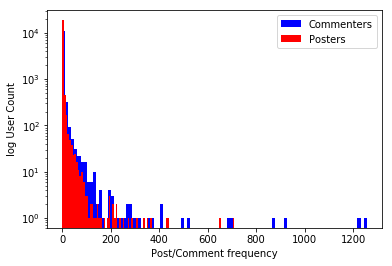

In [4]:
plt.hist(user_comment_df['comment_count'], bins=100, color='b', label= 'Commenters')
plt.hist(user_post_df['post_count'], bins=100, color='r', label= 'Posters')
plt.xlabel('Post/Comment frequency')
plt.ylabel('log User Count')
plt.yscale('log')
plt.legend()

# Does frequent interaction affect user reputation?
I define interaction either in the act of either posting or commenting. There seems to be a correlation between frequency of interaction and reputation.

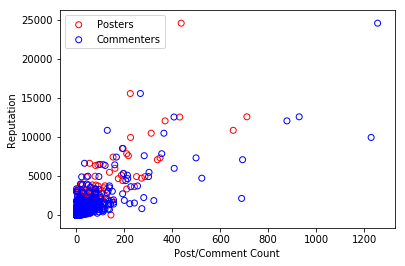

In [5]:
plt.scatter(user_post_df.post_count, user_post_df.reputation, facecolors='none', edgecolors='r', label= 'Posters')
plt.scatter(user_comment_df.comment_count, user_comment_df.reputation, facecolors='none', edgecolors='b', label= 'Commenters')
plt.xlabel('Post/Comment Count')
plt.ylabel('Reputation')
plt.legend()

# Does user reputation comes with account age?
Roughly, yes.

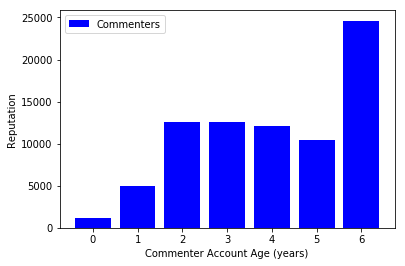

In [6]:
plt.bar(user_comment_df.age, user_comment_df.reputation, color='b',  label= 'Commenters')
plt.xlabel('Commenter Account Age (years)')
plt.ylabel('Reputation')
plt.legend()

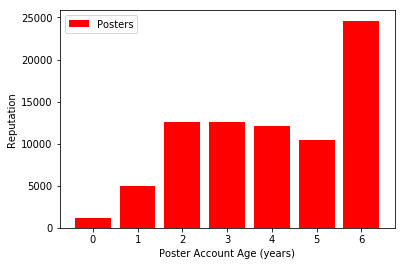

In [7]:
plt.bar(user_post_df.age, user_post_df.reputation, color='r', label= 'Posters')
plt.xlabel('Poster Account Age (years)')
plt.ylabel('Reputation')
plt.legend()

# Users post answers or comments more often than asking.
I define the question-to-reply ratio for a user as $R(user) = \frac{N(Questions)}{N(Answers) + N(Comments)}$. A ratio of greater than 1 tells us that more questioning is done. For existing users who posted questions, answers, and comments at least once, 1718 users 'replies' more while 109 users 'asks' more.

Text(0,0.5,'User Count')

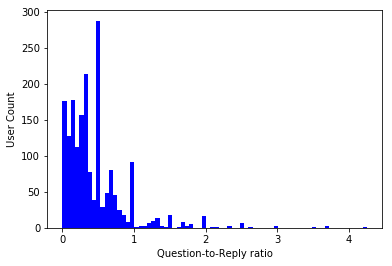

In [8]:
plt.hist(ques_rep_df['ques_to_reply_ratio'], bins='fd', color='b')
plt.xlabel('Question-to-Reply ratio')
plt.ylabel('User Count')

In [9]:
len(ques_rep_df[ques_rep_df['ques_to_reply_ratio']<=1])

1718

In [10]:
len(ques_rep_df[ques_rep_df['ques_to_reply_ratio']>1])

109

# Users post answers more often than asking.
I define the question-to-reply ratio for a user as $R(user) = \frac{N(Questions)}{N(Answers)}$. A ratio of greater than 1 tells us that more questioning is done roughly. For existing users who posted questions and answers at least once, 1563 users post more answers while 776 users post more questions.

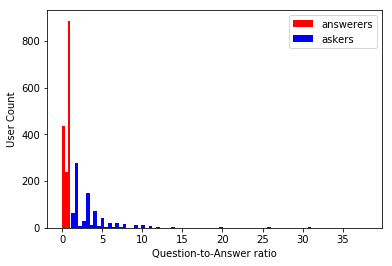

In [11]:
#plt.hist(ques_ans_df['ques_to_ans_ratio'], bins=100, label='total')
plt.hist(ques_ans_df['ques_to_ans_ratio'][ques_ans_df['ques_to_ans_ratio']<=1], bins=3, color='r', label='answerers')
plt.hist(ques_ans_df['ques_to_ans_ratio'][ques_ans_df['ques_to_ans_ratio']>1], bins=80, color='b', label='askers')

plt.xlabel('Question-to-Answer ratio')
plt.ylabel('User Count')
plt.legend()

In [12]:
len(ques_ans_df[ques_ans_df['ques_to_ans_ratio']<=1])

1563

In [13]:
len(ques_ans_df[ques_ans_df['ques_to_ans_ratio']>1])

776

# A user posts about a variety of topics.
Based from tagged posts (which is a very small subset of the posts), users are interested in a variety of topics and doesn't only post about one topic.

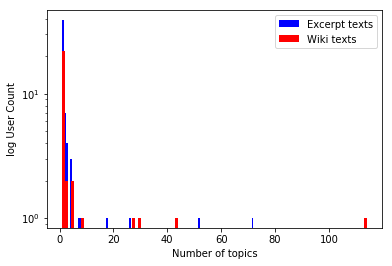

In [14]:
plt.hist(excerpt_topic_cts_df['excerptpost_topic_count'], bins=100, color='b', label= 'Excerpt texts')
plt.hist(wiki_topic_cts_df['wikipost_topic_count'], bins=100, color='r', label= 'Wiki texts')
plt.xlabel('Number of topics')
plt.ylabel('log User Count')
plt.yscale('log')
plt.legend()